### Model Interpretability through SHapley Additive exPlanations (SHAP XAI)

> Useful to explain the output of machine learning models based on game theory. It determines which features are responsible for the model's prediction. SHAP provides local explanations (i.e., for individual predictions) as well as global explanations (i.e., for overall model behavior).

In [1]:
import pickle
import shap
import numpy as np

c:\Users\vaibh\codes-program\VaibhavAutodeskProjectIncomplete\VaibhavAutodeskProject\supervenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the best model
mymodel = pickle.load(open("res/model.pkl", "rb"))

In [ ]:
# Load the numpy arrays
x_train = np.load('res/x_train.npy')
x_test = np.load('res/x_test.npy')

In [ ]:
# Calculate the SHAP Values for each feature
feature_names = [
    "Education", 
    "Applicant Income", 
    "Coapplicant Income", 
    "Loan Amount", 
    "Loan Amount Term", 
    "Credit History", 
    "Dependents_0",  
    "Dependents_1",  
    "Dependents_2",  
    "Dependents_3+", 
    "Property_Rural",  
    "Property_Semiurban",  
    "Property_Urban"  
]

explainer = shap.Explainer(mymodel, x_train, feature_names=feature_names)
shap_values = explainer(x_test)

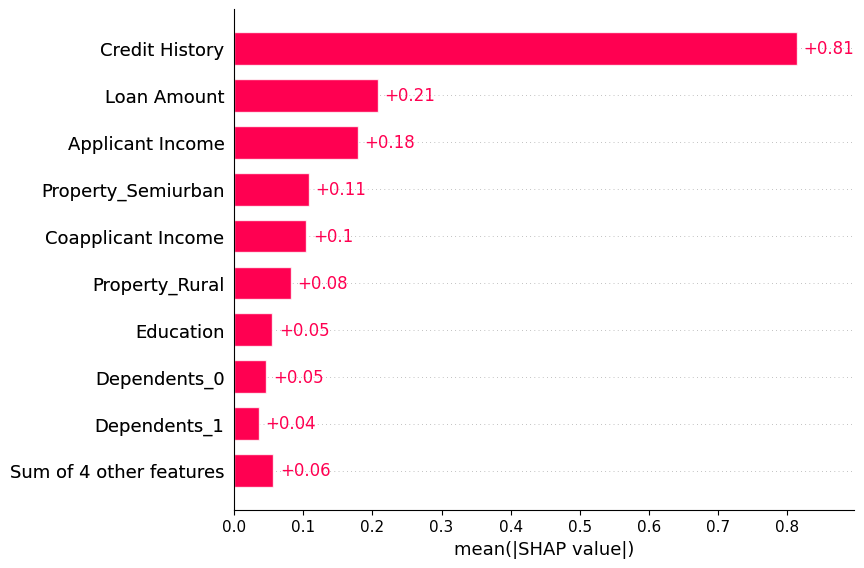

In [7]:
shap.plots.bar(shap_values)

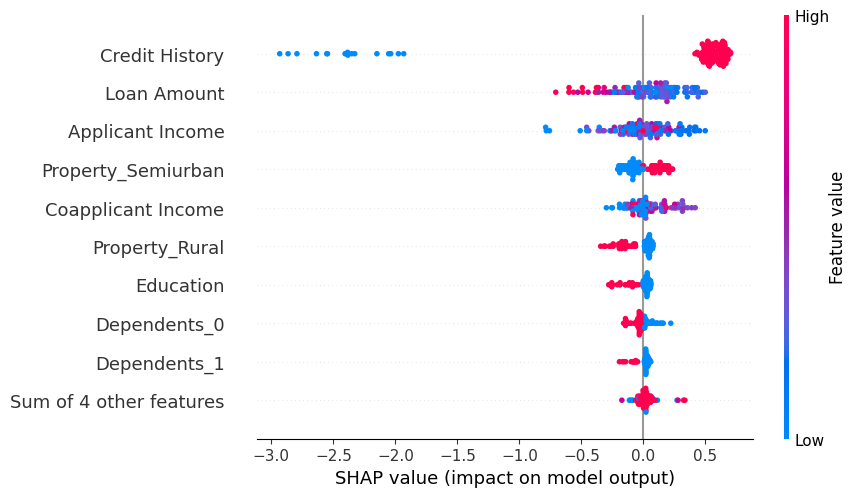

In [8]:
shap.plots.beeswarm(shap_values)

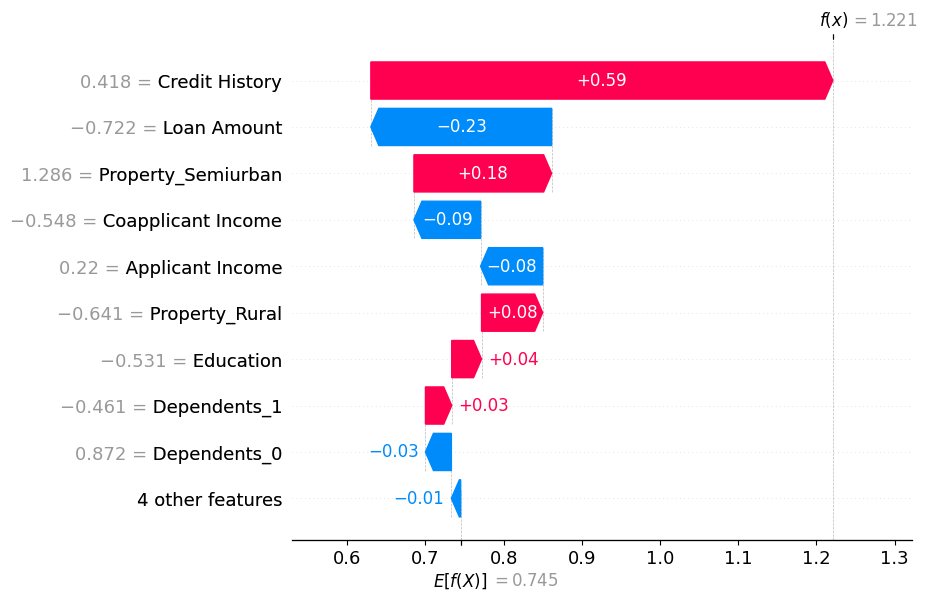

In [9]:
shap.plots.waterfall(shap_values[0])

#### Positive SHAP values increase the probability of loan approval:

- Credit History: This is the most impactful feature. A positive SHAP value for this feature implies a good credit history, which significantly increases the likelihood of loan approval.

- Property_Semiurban: This feature also has a positive impact, suggesting that applicants residing in semi-urban areas are more likely to get their loan approved.

- Property_Rural: This feature has a small positive impact, suggesting that rural location might slightly increase the chances of approval
.
- Applicant Income: This feature has a small positive impact, implying higher income might slightly improve the chances of loan approval.

- Education: This feature has a small positive impact, suggesting that a positive education level could improve approval chances, though this impact is minimal.

#### Negative SHAP values decrease the probability of loan approval:

- Loan Amount: This feature has a noticeable negative impact, suggesting that higher loan amounts decrease the likelihood of approval.